In [16]:
from sklearn.datasets import make_moons
import pandas as pd

import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 25, 12.5

sns.set_style("dark")

X, y = make_moons(n_samples=int(1e2), noise=0.05, random_state=0)

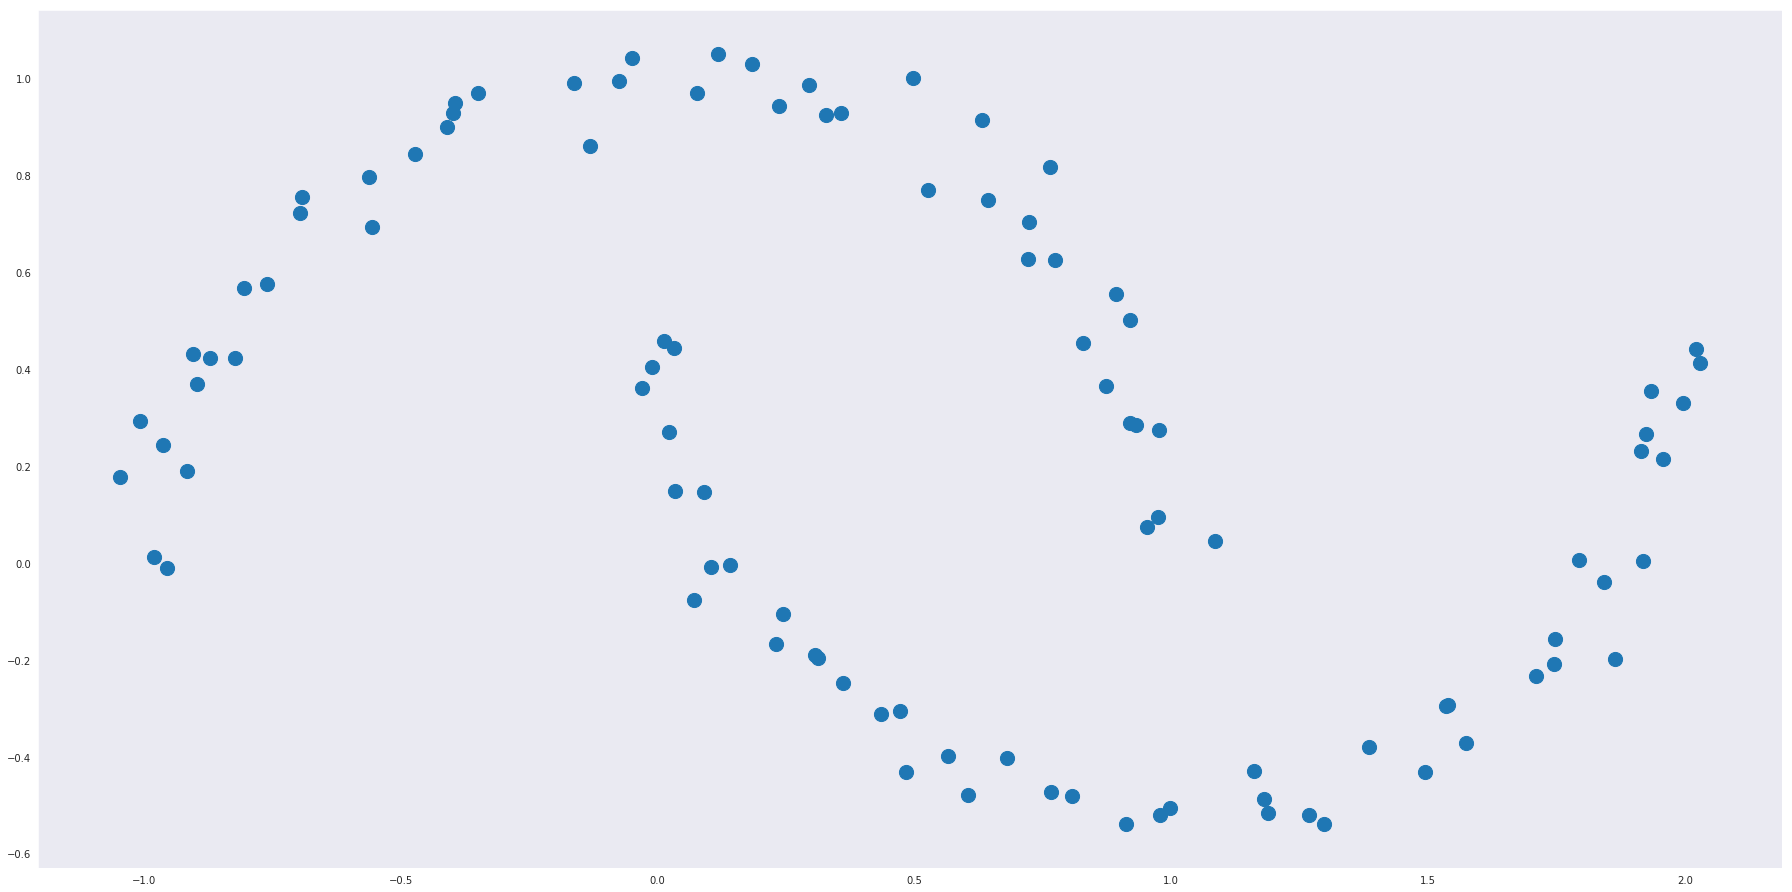

In [17]:
plt.scatter(X[:, 0], X[:, 1], s = 200)
plt.tight_layout()
plt.show()

In [26]:
import cudf

from cuml import DBSCAN
db = DBSCAN(eps=0.3, min_samples=2)

In [27]:
X_df = pd.DataFrame({'fea%d'%i: X[:, i] for i in range(X.shape[1])})
X_gpu = cudf.DataFrame.from_pandas(X_df)

In [28]:
db.fit(X_gpu)

In [29]:
y_db_gpu = db.fit_predict(X_gpu)

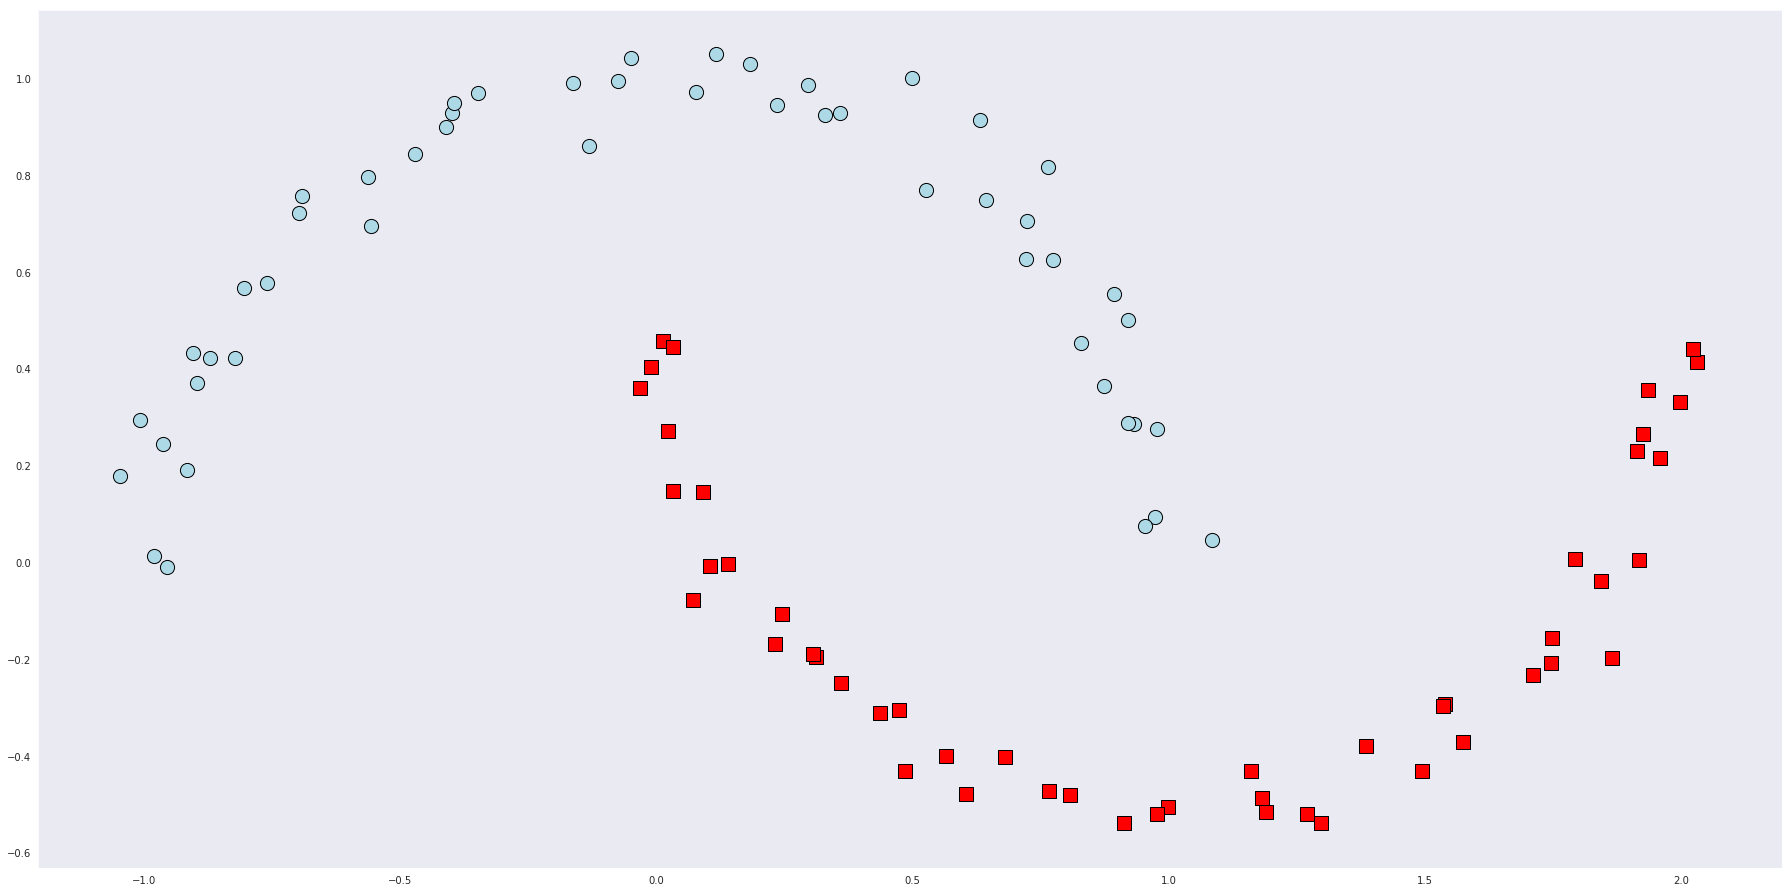

In [30]:


plt.scatter(X[y_db_gpu == 0, 0], X[y_db_gpu == 0, 1],
            c='lightblue', marker='o', s=200,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_gpu == 1, 0], X[y_db_gpu == 1, 1],
            c='red', marker='s', s=200,
            edgecolor='black', 
            label='cluster 2')
plt.tight_layout()
